In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)

In [36]:
original_data = pd.read_csv('data/sample_submission.csv')
original_data.shape

(3500, 37)

In [37]:
original_data.head()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,NH4_4,NH4_5,NH4_6,NH4_7,NO2_1,NO2_2,NO2_3,NO2_4,NO2_5,NO2_6,NO2_7,NO3_1,NO3_2,NO3_3,NO3_4,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.00,9.545,9.265,8.110,8.43,7.15,0.180,0.200,0.650,14.515,5.845,1.285,0.429,0.030,0.050,0.064,0.730,1.075,0.056,0.567,0.400,1.500,1.560,19.355,4.95,1.730,1.800,4.800,3.15,10.665,10.465,16.645,5.75,10.37
1,1,9.10,13.533,40.90,8.770,9.265,6.015,10.07,7.15,1.107,1.027,1.848,8.625,12.175,0.280,0.440,0.089,1.360,0.064,0.902,1.454,0.056,0.190,2.347,5.105,2.095,19.355,20.05,9.530,7.695,4.550,6.95,2.040,5.200,5.725,2.95,2.23
2,2,8.21,3.710,5.42,8.770,9.265,4.550,10.07,7.15,0.020,0.020,0.650,17.144,24.645,0.380,0.440,0.060,0.050,0.082,0.902,2.025,0.056,0.567,1.700,1.700,3.960,4.900,4.58,3.025,3.960,4.935,4.95,4.725,6.075,6.750,3.50,3.17
3,3,8.39,8.700,8.10,9.500,9.200,5.200,8.67,6.67,0.280,0.270,1.730,3.870,8.410,1.480,1.380,0.050,0.050,0.070,0.530,1.740,0.050,0.064,1.500,1.500,2.020,3.960,8.45,2.070,1.730,6.300,4.70,3.500,6.200,8.670,2.90,7.37
4,4,8.07,8.050,8.65,7.960,9.265,3.290,10.07,7.15,0.360,0.435,0.650,3.850,5.845,0.280,0.440,0.105,0.115,0.074,1.252,1.075,0.071,0.190,1.050,1.150,2.095,3.902,2.02,1.730,0.760,4.800,4.97,3.950,2.800,8.400,3.50,3.90


In [38]:
# Is there any missing data?
is_null_result = original_data.isnull().sum()
is_nan_result = original_data.isna().sum()

# Print a warning if there is any missing data
if is_null_result.sum() > 0:
    print('Warning: There is missing data')
else:
    print('There is no missing data')

# Print a warning if there is any nan data
if is_nan_result.sum() > 0:
    print('Warning: There is nan data')
else:
    print('There is no nan data')

There is no missing data
There is no nan data


In [39]:
# Remove the id column
transformed_dataset = original_data.drop('id', axis=1)
transformed_dataset.head()

,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,NH4_4,NH4_5,NH4_6,NH4_7,NO2_1,NO2_2,NO2_3,NO2_4,NO2_5,NO2_6,NO2_7,NO3_1,NO3_2,NO3_3,NO3_4,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,8.59,7.500,9.00,9.545,9.265,8.110,8.43,7.15,0.180,0.200,0.650,14.515,5.845,1.285,0.429,0.030,0.050,0.064,0.730,1.075,0.056,0.567,0.400,1.500,1.560,19.355,4.95,1.730,1.800,4.800,3.15,10.665,10.465,16.645,5.75,10.37
1,9.10,13.533,40.90,8.770,9.265,6.015,10.07,7.15,1.107,1.027,1.848,8.625,12.175,0.280,0.440,0.089,1.360,0.064,0.902,1.454,0.056,0.190,2.347,5.105,2.095,19.355,20.05,9.530,7.695,4.550,6.95,2.040,5.200,5.725,2.95,2.23
2,8.21,3.710,5.42,8.770,9.265,4.550,10.07,7.15,0.020,0.020,0.650,17.144,24.645,0.380,0.440,0.060,0.050,0.082,0.902,2.025,0.056,0.567,1.700,1.700,3.960,4.900,4.58,3.025,3.960,4.935,4.95,4.725,6.075,6.750,3.50,3.17
3,8.39,8.700,8.10,9.500,9.200,5.200,8.67,6.67,0.280,0.270,1.730,3.870,8.410,1.480,1.380,0.050,0.050,0.070,0.530,1.740,0.050,0.064,1.500,1.500,2.020,3.960,8.45,2.070,1.730,6.300,4.70,3.500,6.200,8.670,2.90,7.37
4,8.07,8.050,8.65,7.960,9.265,3.290,10.07,7.15,0.360,0.435,0.650,3.850,5.845,0.280,0.440,0.105,0.115,0.074,1.252,1.075,0.071,0.190,1.050,1.150,2.095,3.902,2.02,1.730,0.760,4.800,4.97,3.950,2.800,8.400,3.50,3.90


In [40]:
# Display a boxplot of each columns
transformed_dataset.boxplot(figsize=(20, 3))

<Axes: >

In [41]:
# Display more information on the dataset
transformed_dataset.describe(include='all')

,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,NH4_4,NH4_5,NH4_6,NH4_7,NO2_1,NO2_2,NO2_3,NO2_4,NO2_5,NO2_6,NO2_7,NO3_1,NO3_2,NO3_3,NO3_4,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.00000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,8.473834,8.216993,9.291581,9.633064,8.065733,5.671581,9.461363,6.547433,0.340525,0.397956,1.036098,7.074487,14.709377,0.466592,0.540403,0.08223,0.113137,0.097065,0.724153,1.190117,0.065045,0.230348,1.944999,2.184933,4.351799,10.866664,8.710466,3.002243,3.242654,4.816718,4.754389,4.285660,5.968980,7.837995,3.750349,4.068639
std,1.885712,3.040743,6.817822,1.439039,1.463881,2.721399,1.140365,1.663266,0.284751,0.452237,0.595943,5.279023,51.402198,0.311071,0.288486,0.10647,0.198144,0.082717,0.352611,0.634958,0.075737,0.213995,1.691173,1.496552,4.329417,6.003792,6.438648,2.918355,2.713923,2.009161,1.547491,2.093388,2.576146,3.724861,1.682421,1.894632
min,1.300000,0.000000,0.000000,4.900000,2.300000,0.200000,0.000000,0.000000,0.020000,0.020000,0.120000,0.252000,0.848000,0.052000,0.052000,0.00000,0.006000,0.000000,-4.000000,0.040000,0.000000,0.010000,0.000000,0.000000,0.000000,0.515000,0.044000,0.011000,0.000000,0.570000,0.089000,0.850000,2.025000,2.020000,0.364000,1.600000
25%,7.470000,7.100000,7.300000,8.770000,6.830000,4.550000,8.980000,5.877500,0.214500,0.200000,0.650000,3.850000,8.415000,0.310000,0.429000,0.03800,0.040000,0.040000,0.560000,0.848000,0.056000,0.071000,0.790000,1.205000,2.020000,5.240000,4.450000,1.140000,1.780000,3.520000,3.950000,2.290000,4.950000,5.725000,2.684000,2.900000
50%,8.280000,7.890000,8.300000,9.500000,7.980000,5.800000,9.430000,6.430000,0.247000,0.245000,0.698000,5.560000,12.175000,0.380000,0.429000,0.05800,0.060000,0.074000,0.805000,1.075000,0.056000,0.150000,1.600000,1.855000,2.095000,7.980000,6.054000,1.730000,1.800000,4.600000,4.800000,3.950000,5.725000,7.500000,3.500000,3.700000
75%,9.110000,9.100000,8.700000,9.545000,9.265000,7.015000,10.070000,7.150000,0.370000,0.405000,1.640000,10.090000,16.645000,0.429000,0.440000,0.07500,0.095000,0.134000,0.902000,1.454000,0.071000,0.191000,2.400000,2.600000,4.960000,16.925000,14.515000,3.025000,4.237500,5.000000,5.400000,4.725000,6.250000,8.400000,4.150000,4.450000
max,65.930000,46.950000,65.950000,16.900000,21.800000,59.400000,40.190000,15.900000,4.200000,3.600000,14.515000,46.800000,3026.000000,2.680000,2.600000,0.95000,2.347000,2.050000,3.980000,8.400000,1.560000,2.120000,28.500000,10.580000,21.700000,29.030000,35.000000,19.355000,27.025000,11.650000,10.700000,19.800000,55.400000,82.450000,19.375000,10.370000


The column NH4_5 seems to have a outlier. We will delete this element before going further.

In [42]:
# Delete the row with the outlier

# Delete the row with the maximum value in the column `NH4_5`
transformed_dataset = transformed_dataset.drop(transformed_dataset['NH4_5'].idxmax())

# Display the informations of the dataset
transformed_dataset.describe(include='all')

,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,NH4_4,NH4_5,NH4_6,NH4_7,NO2_1,NO2_2,NO2_3,NO2_4,NO2_5,NO2_6,NO2_7,NO3_1,NO3_2,NO3_3,NO3_4,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
count,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000
mean,8.471709,8.214797,9.289969,9.633251,8.066275,5.672551,9.461500,6.547260,0.340459,0.397916,1.036335,7.075851,13.848763,0.466617,0.540434,0.082228,0.113117,0.097085,0.724129,1.190191,0.065047,0.230398,1.944819,2.184817,4.348851,10.865547,8.710728,3.002238,3.241775,4.816145,4.753762,4.284870,5.968950,7.838306,3.749314,4.067658
std,1.881785,3.038401,6.818129,1.439203,1.463739,2.721184,1.140499,1.663472,0.284765,0.452295,0.595863,5.279161,7.063905,0.311112,0.288521,0.106485,0.198169,0.082720,0.352659,0.635034,0.075748,0.214005,1.691381,1.496750,4.326519,6.004287,6.439550,2.918772,2.713812,2.009162,1.547267,2.093165,2.576514,3.725348,1.681548,1.894014
min,1.300000,0.000000,0.000000,4.900000,2.300000,0.200000,0.000000,0.000000,0.020000,0.020000,0.120000,0.252000,0.848000,0.052000,0.052000,0.000000,0.006000,0.000000,-4.000000,0.040000,0.000000,0.010000,0.000000,0.000000,0.000000,0.515000,0.044000,0.011000,0.000000,0.570000,0.089000,0.850000,2.025000,2.020000,0.364000,1.600000
25%,7.470000,7.100000,7.300000,8.770000,6.840000,4.550000,8.980000,5.865000,0.214000,0.200000,0.650000,3.850000,8.415000,0.310000,0.429000,0.038000,0.040000,0.040000,0.560000,0.848000,0.056000,0.071000,0.790000,1.205000,2.020000,5.240000,4.450000,1.140000,1.780000,3.520000,3.950000,2.290000,4.950000,5.725000,2.668000,2.900000
50%,8.280000,7.880000,8.300000,9.500000,7.980000,5.800000,9.430000,6.430000,0.247000,0.245000,0.698000,5.560000,12.175000,0.380000,0.429000,0.058000,0.060000,0.074000,0.805000,1.075000,0.056000,0.150000,1.600000,1.855000,2.095000,7.980000,6.054000,1.730000,1.800000,4.600000,4.800000,3.950000,5.725000,7.500000,3.500000,3.700000
75%,9.110000,9.100000,8.700000,9.545000,9.265000,7.015000,10.070000,7.150000,0.370000,0.405000,1.640000,10.090000,16.645000,0.429000,0.440000,0.075000,0.095000,0.134000,0.902000,1.454000,0.071000,0.191000,2.400000,2.600000,4.960000,16.950000,14.515000,3.025000,4.200000,5.000000,5.400000,4.725000,6.250000,8.400000,4.150000,4.450000
max,65.930000,46.950000,65.950000,16.900000,21.800000,59.400000,40.190000,15.900000,4.200000,3.600000,14.515000,46.800000,56.140000,2.680000,2.600000,0.950000,2.347000,2.050000,3.980000,8.400000,1.560000,2.120000,28.500000,10.580000,21.700000,29.030000,35.000000,19.355000,27.025000,11.650000,10.700000,19.800000,55.400000,82.450000,19.375000,10.370000


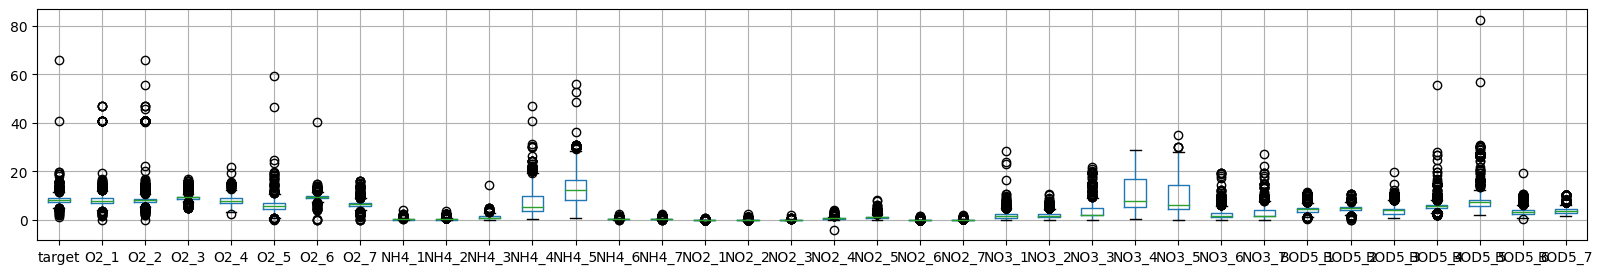

In [49]:
# Redisplay the boxplot of each columns
transformed_dataset.boxplot(figsize=(20, 3))
plt.show()

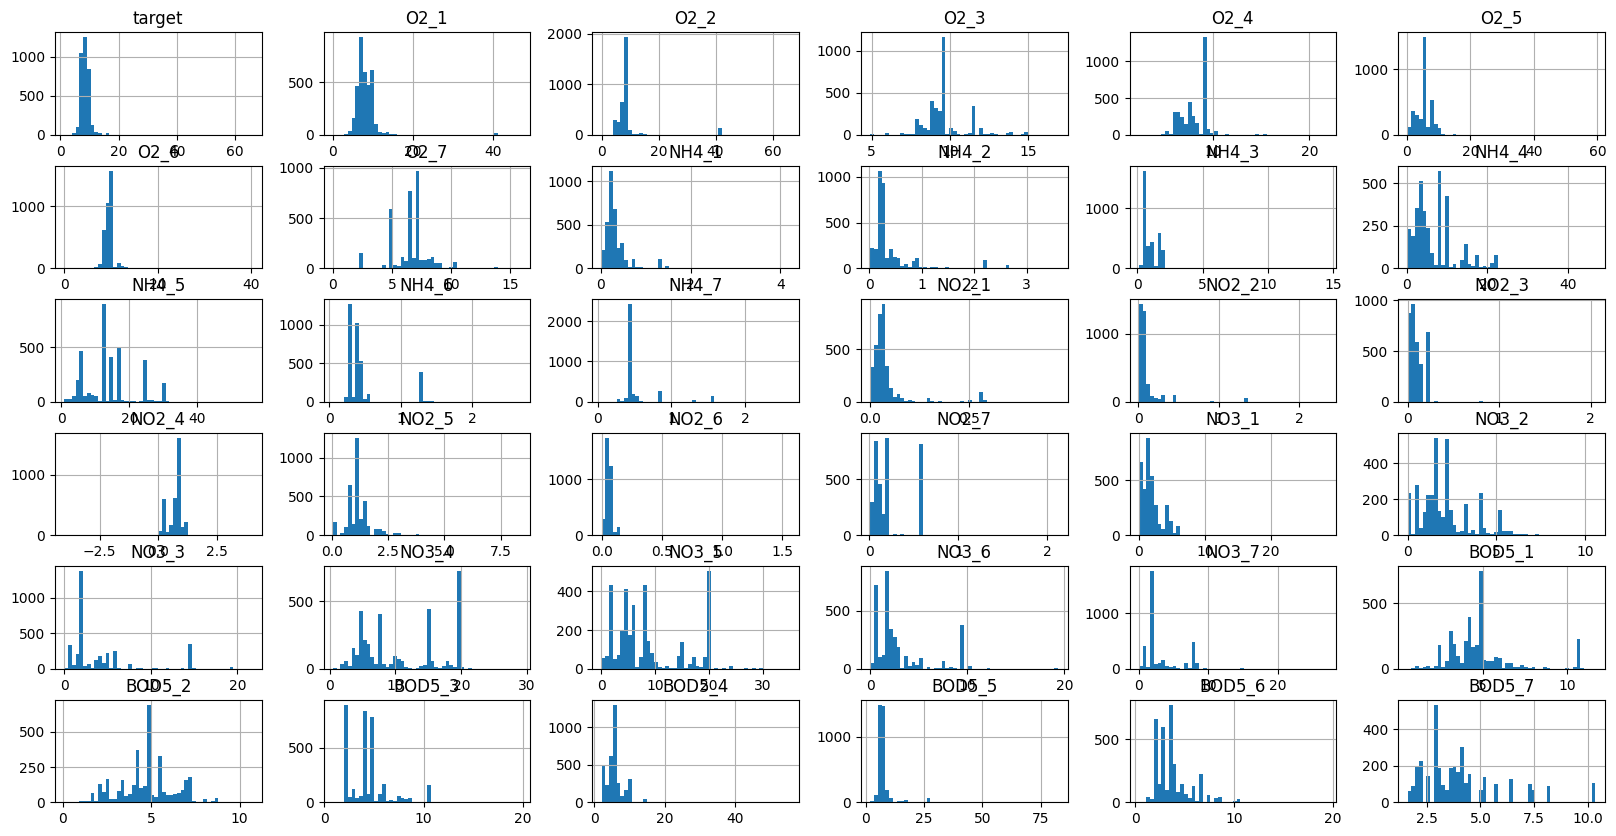

In [44]:
# Display an histogram of each columns
transformed_dataset.hist(figsize=(20, 10), bins=50)
plt.show()

In [50]:
# # IQR method

# # Assuming 'feature_name' is the feature you're focusing on
# feature_name = 'BOD5_5'

# # IQR method applied only to the specific feature
# Q1 = transformed_dataset[feature_name].quantile(0.1)
# Q3 = transformed_dataset[feature_name].quantile(0.9)
# IQR = Q3 - Q1

# # Filter data based on the specific feature's IQR
# filtered_data = transformed_dataset[~((transformed_dataset[feature_name] < (Q1 - 1.5 * IQR)) | 
#                                       (transformed_dataset[feature_name] > (Q3 + 1.5 * IQR)))]

# # Plot histogram of the filtered data
# filtered_data.hist(figsize=(20, 10), bins=50)
# plt.show()

IQR method didn't give good result and worsen the result.

In [61]:
# # Z-score method
# def detect_outliers_with_modified_zscore(series, threshold=3.5):
#     # Compute the median of the series
#     median_val = series.median()

#     # Compute the Median Absolute Deviation (MAD)
#     mad_val = ((series - median_val).abs()).median()

#     # Compute the modified Z-scores
#     # Note: We add a small constant to the denominator to avoid division by zero
#     modified_z_scores = 0.6745 * (series - median_val) / (mad_val + 1e-10)

#     # Boolean mask for outliers
#     outliers = abs(modified_z_scores) > threshold
    
#     return outliers

# # Apply the function to each feature in the dataframe
# outliers_dict = {col: detect_outliers_with_modified_zscore(transformed_dataset[col]) for col in transformed_dataset.columns}

# # Create a copy of the original dataset
# temp = transformed_dataset.copy()

# # Delete outliers from the dataset
# for col in temp.columns:
#     temp = temp.loc[~outliers_dict[col], :]

# temp.describe(include='all')

Z-Score method didn't worked well either. So we won't use it. 

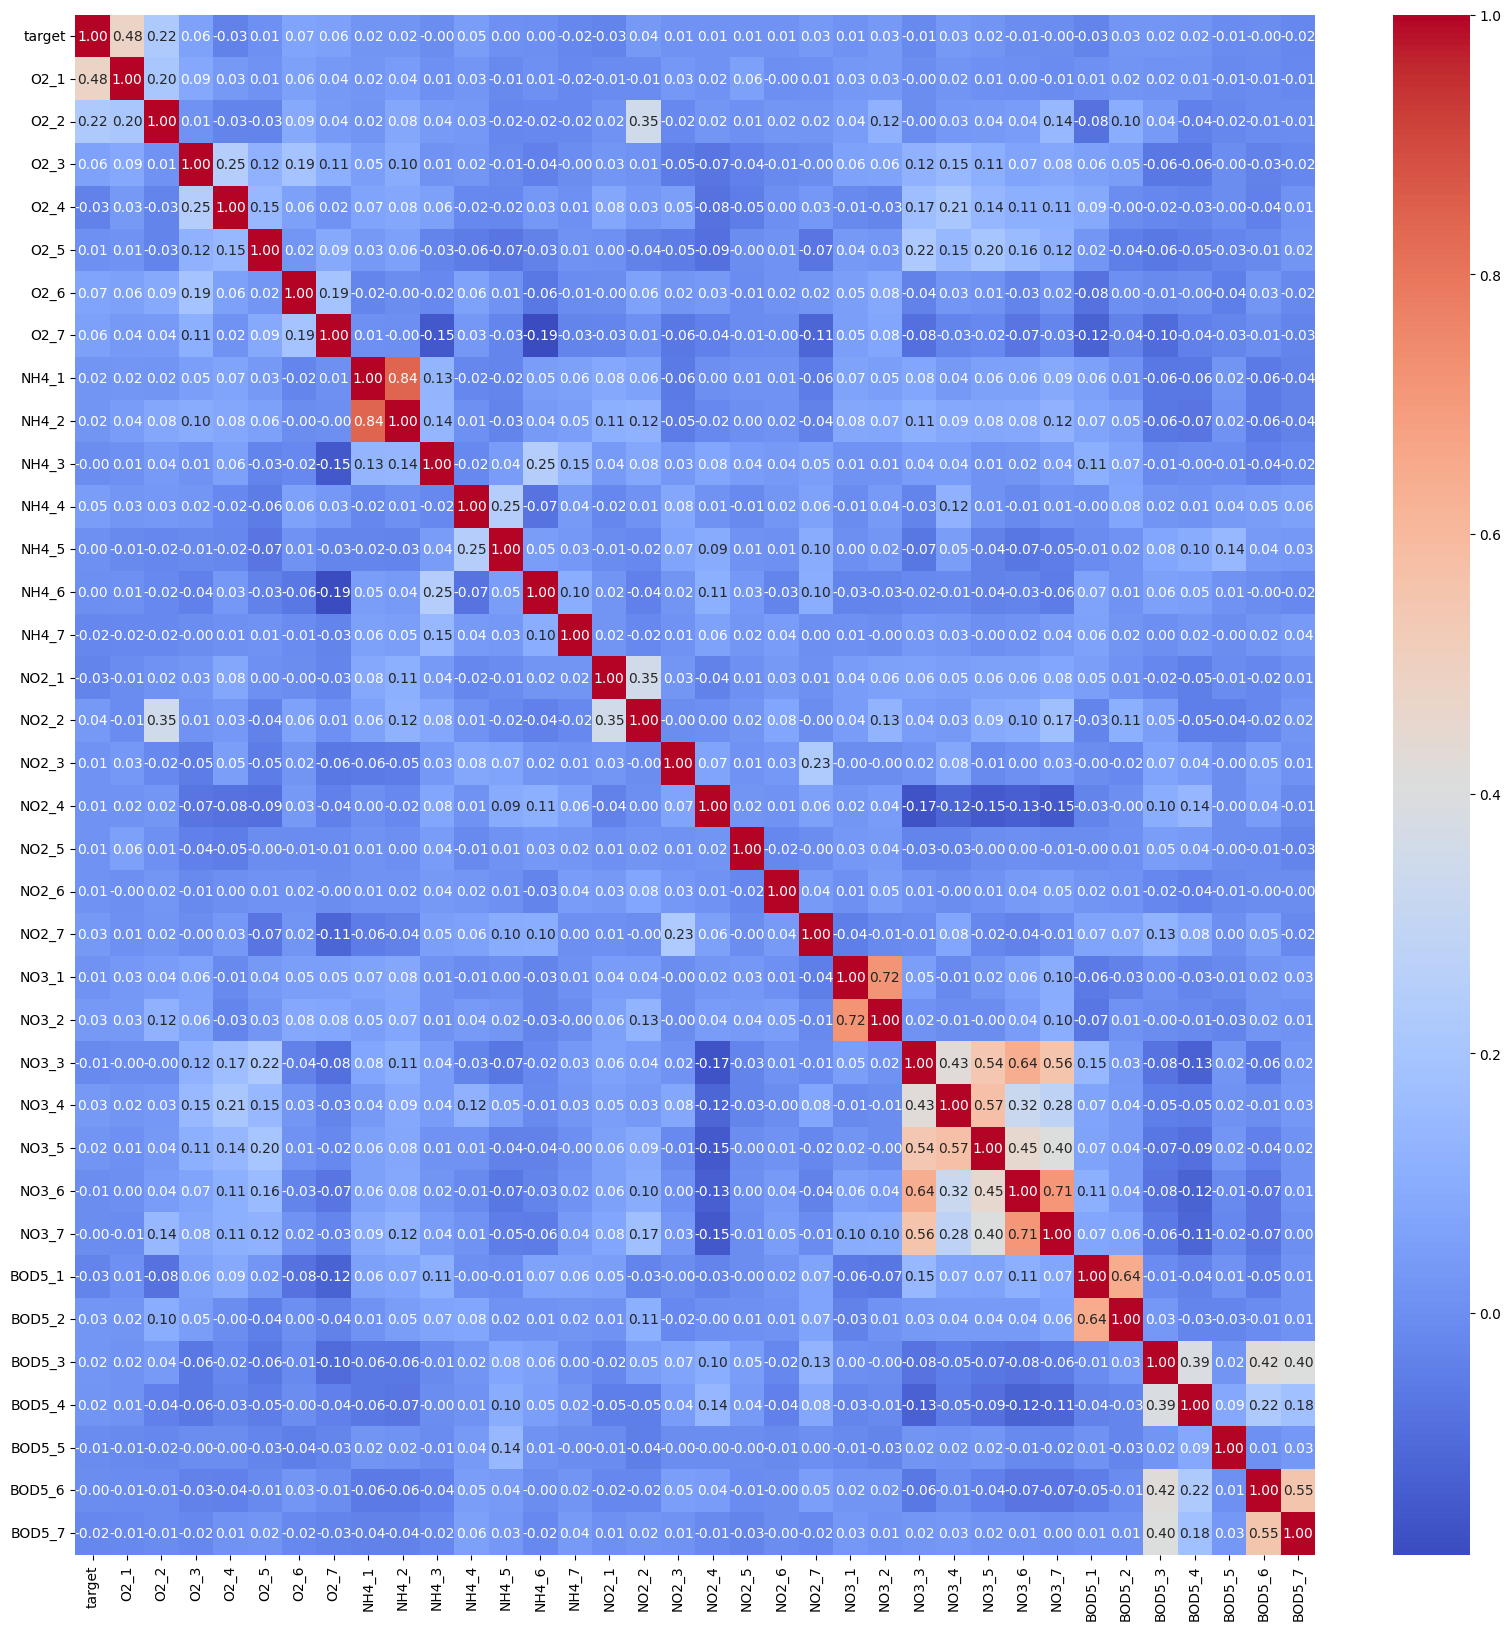

In [62]:
# Display the correlation matrix
corr_matrix = transformed_dataset.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


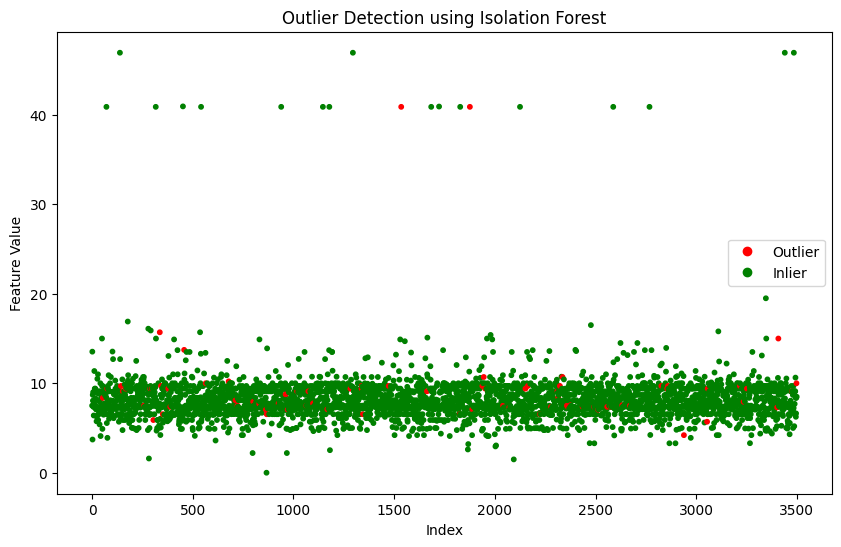

In [73]:
# Isolation forest method
from sklearn.ensemble import IsolationForest

iso_dataset = transformed_dataset.copy()

# Initialize Isolation Forest
clf = IsolationForest(random_state=0)

# Fit and predict outliers
outliers = clf.fit_predict(iso_dataset)

# The prediction will return 1 for inliers and -1 for outliers
iso_dataset["outlier"] = outliers == -1

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(iso_dataset.index, iso_dataset["O2_1"], color=iso_dataset["outlier"].map({True: 'red', False: 'green'}), s=10)
red_patch = plt.plot([], [], "ro")[0]
green_patch = plt.plot([], [], "go")[0]
plt.legend([red_patch, green_patch], ['Outlier', 'Inlier'])
plt.xlabel("Index")
plt.ylabel("Feature Value")
plt.title("Outlier Detection using Isolation Forest")
plt.show()


In [74]:
# Remove the outlier from the dataset
iso_dataset = iso_dataset[iso_dataset["outlier"] == False]

# Remove the outlier column
iso_dataset = iso_dataset.drop("outlier", axis=1)

# Display the informations of the dataset
iso_dataset.describe(include='all')

,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,NH4_4,NH4_5,NH4_6,NH4_7,NO2_1,NO2_2,NO2_3,NO2_4,NO2_5,NO2_6,NO2_7,NO3_1,NO3_2,NO3_3,NO3_4,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
count,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000
mean,8.463159,8.187757,9.204679,9.619877,8.049819,5.647366,9.461229,6.556380,0.331610,0.380618,1.028886,7.071635,13.822473,0.460915,0.535089,0.078978,0.107668,0.097085,0.725041,1.188556,0.064928,0.229553,1.926828,2.171007,4.236049,10.761908,8.602367,2.933919,3.170940,4.781601,4.730873,4.256647,5.952332,7.821249,3.738171,4.042648
std,1.874261,2.956112,6.602566,1.428351,1.455074,2.619692,1.126056,1.621123,0.270355,0.421991,0.595274,5.284828,7.087234,0.304273,0.278932,0.099971,0.186808,0.083067,0.352792,0.637108,0.076430,0.213092,1.629747,1.489228,4.208236,5.971424,6.370427,2.840340,2.638748,1.957410,1.526045,2.044136,2.551799,3.723966,1.670080,1.853649
min,1.300000,0.000000,0.000000,4.900000,2.300000,0.200000,0.000000,0.000000,0.020000,0.020000,0.120000,0.252000,0.848000,0.052000,0.052000,0.000000,0.006000,0.000000,-4.000000,0.040000,0.000000,0.010000,0.000000,0.000000,0.000000,0.515000,0.044000,0.011000,0.000000,0.570000,0.089000,0.850000,2.025000,2.020000,0.364000,1.600000
25%,7.470000,7.100000,7.350000,8.770000,6.830000,4.550000,8.980000,5.912500,0.210000,0.200000,0.650000,3.850000,8.074750,0.310000,0.429000,0.038000,0.040000,0.040000,0.560000,0.845750,0.056000,0.071000,0.790000,1.205000,2.020000,5.240000,4.200000,0.950500,1.780000,3.520000,3.950000,2.290000,4.950000,5.725000,2.700000,2.900000
50%,8.280000,7.800000,8.300000,9.500000,7.970000,5.800000,9.470000,6.480000,0.247000,0.245000,0.698000,5.560000,12.175000,0.380000,0.429000,0.058000,0.060000,0.074000,0.805000,1.075000,0.056000,0.150000,1.600000,1.852500,2.095000,7.850000,6.050000,1.730000,1.800000,4.550000,4.800000,3.950000,5.725000,7.400000,3.500000,3.700000
75%,9.110000,9.100000,8.700000,9.545000,9.263750,7.010000,10.070000,7.150000,0.360000,0.400000,1.640000,10.090000,16.645000,0.429000,0.440000,0.070000,0.095000,0.134000,0.902000,1.454000,0.071000,0.191000,2.400000,2.590000,4.900000,15.800000,14.403750,3.020000,3.793750,5.000000,5.400000,4.725000,6.200000,8.400000,4.100000,4.450000
max,65.930000,46.950000,65.950000,16.900000,21.800000,59.400000,40.190000,15.900000,4.200000,3.600000,14.515000,46.800000,56.140000,2.680000,2.210000,0.950000,2.347000,2.050000,3.980000,8.400000,1.560000,2.120000,23.950000,10.580000,20.900000,29.030000,35.000000,19.355000,27.025000,10.950000,10.700000,19.800000,55.400000,82.450000,19.375000,10.370000


In [77]:
# Set all the column at 0, except for target, O2_1 and O2_2
column_to_keep = ['O2_1', 'O2_2', 'target']

for col in iso_dataset.columns:
    if col not in column_to_keep:
        iso_dataset[col] = 0

iso_dataset.describe(include='all')

,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,NH4_4,NH4_5,NH4_6,NH4_7,NO2_1,NO2_2,NO2_3,NO2_4,NO2_5,NO2_6,NO2_7,NO3_1,NO3_2,NO3_3,NO3_4,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
count,3422.000000,3422.000000,3422.000000,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0,3422.0
mean,8.463159,8.187757,9.204679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.874261,2.956112,6.602566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.300000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,7.470000,7.100000,7.350000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,8.280000,7.800000,8.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,9.110000,9.100000,8.700000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,65.930000,46.950000,65.950000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
# Create a submission file

# Recreate the id column from the row number
iso_dataset['id'] = iso_dataset.index
iso_dataset.set_index('id', inplace=True)
submission = iso_dataset.reset_index(drop=True).copy()
submission.to_csv('submission.csv', index=True, index_label='id')
# print the shape
print(submission.shape)

(3422, 36)


In [68]:
submission.describe()

,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,NH4_4,NH4_5,NH4_6,NH4_7,NO2_1,NO2_2,NO2_3,NO2_4,NO2_5,NO2_6,NO2_7,NO3_1,NO3_2,NO3_3,NO3_4,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
count,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000
mean,8.324742,7.936655,9.144852,9.617813,8.063132,5.655802,9.446280,6.530161,0.342087,0.399693,1.040765,7.037654,13.864506,0.466839,0.544117,0.082792,0.113378,0.097374,0.722701,1.184874,0.064930,0.231410,1.939607,2.179231,4.374674,10.859215,8.698251,3.021806,3.253283,4.823562,4.747626,4.282712,5.957190,7.847752,3.757883,4.070706
std,1.131701,1.357433,6.608619,1.415686,1.453349,2.550107,1.136939,1.653086,0.287046,0.455539,0.597338,5.206218,7.037768,0.312404,0.293197,0.107474,0.198262,0.082786,0.356541,0.614480,0.072951,0.213853,1.697711,1.495333,4.354649,6.012953,6.450404,2.943989,2.734817,2.029021,1.549037,2.083442,2.595626,3.766372,1.687356,1.903164
min,2.990000,4.700000,2.200000,4.900000,2.300000,0.200000,0.000000,0.000000,0.020000,0.020000,0.120000,0.252000,0.848000,0.052000,0.052000,0.000000,0.006000,0.000000,-4.000000,0.040000,0.000000,0.010000,0.000000,0.000000,0.000000,0.515000,0.044000,0.011000,0.000000,0.570000,0.089000,0.850000,2.025000,2.020000,0.364000,1.600000
25%,7.470000,7.100000,7.300000,8.770000,6.887500,4.550000,8.980000,5.786250,0.215000,0.200000,0.650000,3.850000,8.415000,0.310000,0.429000,0.039000,0.040000,0.056000,0.556000,0.848000,0.056000,0.071000,0.790000,1.205000,2.020000,5.240000,4.240000,0.983500,1.780000,3.520000,3.950000,2.290000,4.950000,5.734750,2.700000,2.900000
50%,8.180000,7.750000,8.300000,9.500000,7.980000,5.800000,9.420000,6.430000,0.247000,0.245000,0.698000,5.560000,12.175000,0.380000,0.429000,0.058000,0.060000,0.074000,0.805000,1.075000,0.056000,0.150000,1.600000,1.855000,2.095000,7.980000,6.054000,1.730000,1.800000,4.600000,4.800000,3.950000,5.725000,7.500000,3.500000,3.700000
75%,9.100000,9.100000,8.700000,9.545000,9.265000,7.015000,10.070000,7.150000,0.390000,0.413750,1.640000,10.090000,16.645000,0.429000,0.486250,0.075000,0.095000,0.134000,0.902000,1.454000,0.071000,0.193000,2.400000,2.600000,4.960000,16.925000,14.515000,3.110000,4.237500,5.000000,5.400000,4.725000,6.250000,8.400000,4.150000,4.450000
max,15.820000,11.000000,55.450000,16.900000,21.800000,46.645000,40.190000,15.900000,4.200000,3.600000,14.515000,46.800000,56.140000,2.680000,2.600000,0.950000,2.347000,2.050000,3.980000,8.400000,1.560000,2.120000,28.500000,10.580000,21.700000,29.030000,35.000000,19.355000,27.025000,11.650000,10.700000,14.790000,55.400000,82.450000,19.375000,10.370000
